In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import tensorflow as tf
from keras.layers import Dense, Activation, Input, Dropout
from keras import Sequential

from sklearn.model_selection import train_test_split as tts, StratifiedKFold as skf

In [2]:
data = pd.read_csv('../data/ppm.csv')

X = data.Year
Y = data.PPM

In [3]:
Y.head()

0    315.98
1    316.91
2    317.64
3    318.45
4    318.99
Name: PPM, dtype: float64

In [44]:
model = Sequential(
    [
        # Input(shape=(47,)),
        Dense(units=4096, activation='relu', input_shape=(1,)),
        Dropout(0.2),
        # Dense(units=4096, activation='relu'),
        Dense(units=2048, activation='relu'),
        Dense(units=1024, activation='relu'),
        Dense(units=512, activation='relu'),
        Dense(units=256, activation='relu'),
        Dense(units=128, activation='relu'),
        Dense(units=64, activation='relu'),
        Dense(units=32, activation='relu'),
        Dense(units=16, activation='relu'),
        Dense(units=8, activation='relu'),
        Dense(units=4, activation='relu'),
        Dense(units=1, activation='relu'),
    ]
)

model.compile(optimizer='Adagrad', loss='mae', metrics=['mae'])
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.2)

history = model.fit(
    x=X_train,
    y=Y_train,
    validation_data=(X_test, Y_test),
    batch_size=3,
    epochs=100
)

Epoch 1/100
17/17 [==============================] - 1s 25ms/step - loss: 194.1770 - mae: 194.1770 - val_loss: 93.4161 - val_mae: 93.4161
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 44.5157 - mae: 44.5157 - val_loss: 20.5781 - val_mae: 20.5781
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 38.9453 - mae: 38.9453 - val_loss: 54.5289 - val_mae: 54.5289
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 35.1074 - mae: 35.1074 - val_loss: 21.1630 - val_mae: 21.1630
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 33.1315 - mae: 33.1315 - val_loss: 65.9559 - val_mae: 65.9559
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 32.0239 - mae: 32.0239 - val_loss: 31.2756 - val_mae: 31.2756
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 29.6063 - mae: 29.6063 - val_loss: 29.8304 - val_mae: 29.8304
Epoch 8/100
17/17 [==============================] -

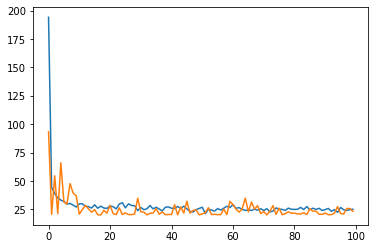

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [46]:
min(history.history['val_loss'])

20.109025955200195

: 